In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#df = pd.read_csv('cumulative_clean.csv',usecols = columns)
df = pd.read_csv('cumulative_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9201 non-null   int64  
 1   kepoi_name         9201 non-null   object 
 2   kepler_name        2742 non-null   object 
 3   koi_disposition    9201 non-null   int64  
 4   koi_pdisposition   9201 non-null   int64  
 5   koi_score          7995 non-null   float64
 6   koi_fpflag_nt      9201 non-null   int64  
 7   koi_fpflag_ss      9201 non-null   int64  
 8   koi_fpflag_co      9201 non-null   int64  
 9   koi_fpflag_ec      9201 non-null   int64  
 10  koi_period         9201 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9201 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [4]:
#Removing the unnecessary features
# drop columns with greater than 500 null values
missing_values_count = df.isnull().sum()
columns_to_keep = missing_values_count[missing_values_count <= 500].index
df_filtered = df[columns_to_keep]
#remove kepid and kepoi_name
df_filtered = df_filtered.drop(['kepid','kepoi_name','koi_pdisposition','koi_tce_delivname'], axis=1)
df_filtered

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,2,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,1,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,2,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,0,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9197,1,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9198,0,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9199,1,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [5]:
# Dealing with null data fields
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9201 non-null   int64  
 1   koi_fpflag_nt      9201 non-null   int64  
 2   koi_fpflag_ss      9201 non-null   int64  
 3   koi_fpflag_co      9201 non-null   int64  
 4   koi_fpflag_ec      9201 non-null   int64  
 5   koi_period         9201 non-null   float64
 6   koi_period_err1    9201 non-null   float64
 7   koi_period_err2    9201 non-null   float64
 8   koi_time0bk        9201 non-null   float64
 9   koi_time0bk_err1   9201 non-null   float64
 10  koi_time0bk_err2   9201 non-null   float64
 11  koi_impact         9201 non-null   float64
 12  koi_impact_err1    9201 non-null   float64
 13  koi_impact_err2    9201 non-null   float64
 14  koi_duration       9201 non-null   float64
 15  koi_duration_err1  9201 non-null   float64
 16  koi_duration_err2  9201 

                   koi_disposition  koi_fpflag_nt  koi_fpflag_ss   
koi_disposition           1.000000      -0.013027      -0.507267  \
koi_fpflag_nt            -0.013027       1.000000      -0.022295   
koi_fpflag_ss            -0.507267      -0.022295       1.000000   
koi_fpflag_co            -0.465452      -0.003622       0.146250   
koi_fpflag_ec            -0.345992       0.001408       0.092138   
koi_period               -0.006927       0.001458      -0.020058   
koi_period_err1          -0.122583       0.021215      -0.135775   
koi_period_err2           0.122583      -0.021215       0.135775   
koi_time0bk              -0.034101       0.015797      -0.114712   
koi_time0bk_err1         -0.095158       0.014173      -0.173667   
koi_time0bk_err2          0.095158      -0.014173       0.173667   
koi_impact               -0.066041       0.001844       0.042286   
koi_impact_err1          -0.124427      -0.003784       0.147631   
koi_impact_err2           0.002680      -0.00336

C:\Users\liuzi\AppData\Local\Temp\ipykernel_24348\3359599902.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

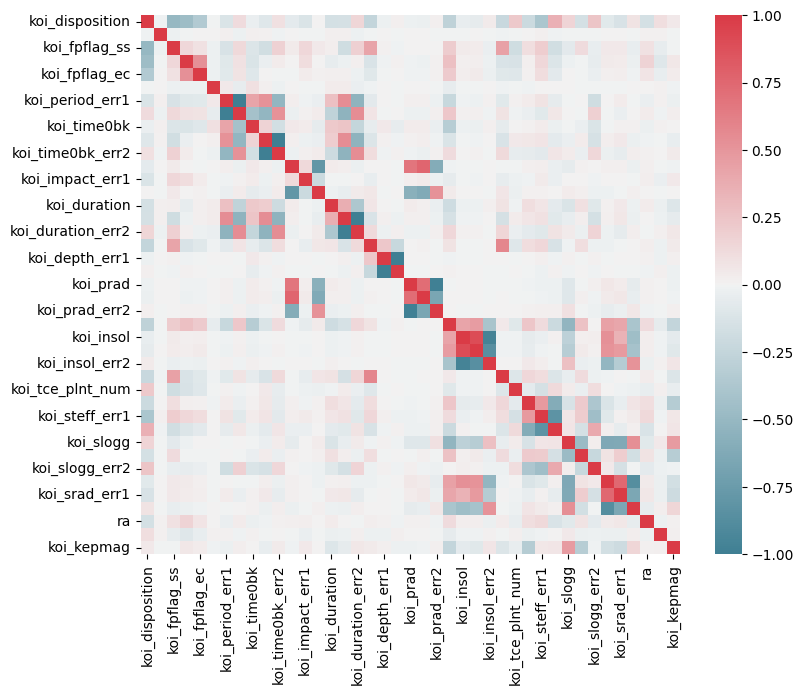

In [6]:
# Building a correlation matrix
corr = df_filtered.corr()
print(corr)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

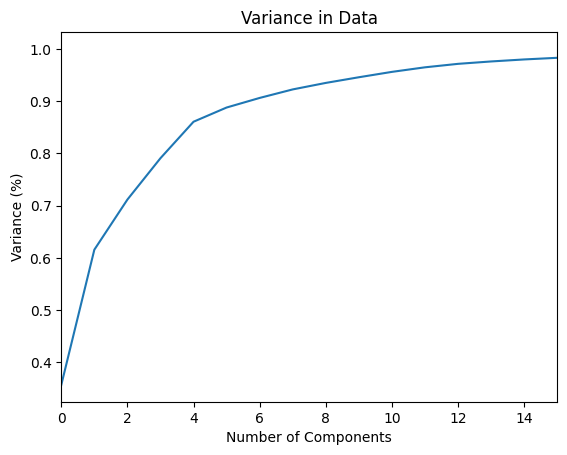

In [7]:
# df DataFrame
data = df_filtered.iloc[:, 1:].values  
# MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
pca = PCA().fit(data_scaled)
# plot the cumulative sum of explained variance ratio
plt.figure()
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.xlim((0, 15))
plt.title('Variance in Data')
plt.show()

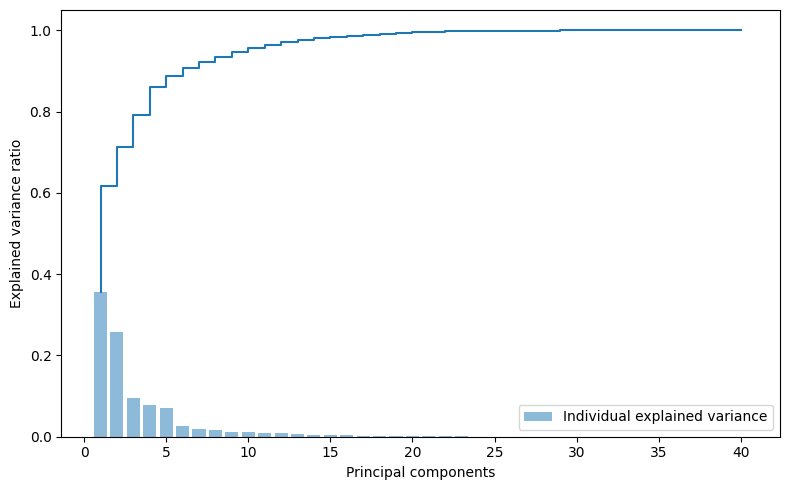

In [8]:
# scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
n_components = 8
pca = PCA(n_components=n_components)
pca.fit(data_scaled)
# transform the data
reduced_data = pca.transform(data_scaled)
# create a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
print(reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0 -0.347724 -0.075527  0.052179  0.253024  0.011805 -0.094366 -0.026202  \
1 -0.354571 -0.078615  0.052884  0.252723  0.012102 -0.099377 -0.020105   
2 -0.318928 -0.072914  0.000108  0.290565 -0.215584 -0.115845  0.034635   
3  0.165692  0.766219  0.159799  0.231576  0.329151 -0.099315 -0.040484   
4 -0.352712 -0.070812  0.082055  0.239146  0.139771 -0.048931 -0.011863   

        PC8  
0 -0.052711  
1 -0.101157  
2  0.038508  
3  0.037128  
4  0.086320  


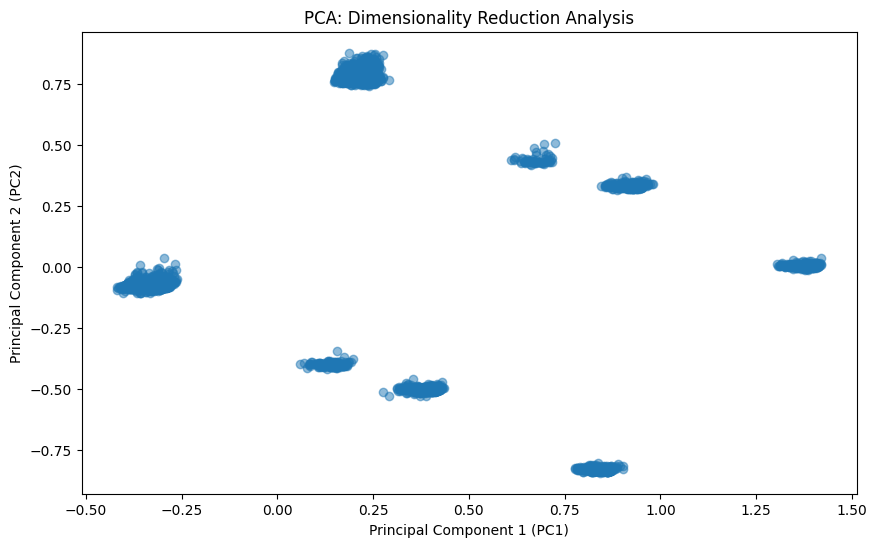

In [10]:
# 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('PCA: Dimensionality Reduction Analysis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [11]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from dataclasses import replace
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN

C:\Users\liuzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\liuzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[16.175438    4.2270155 ]
 [12.979576   13.975662  ]
 [10.94089     9.572293  ]
 ...
 [ 4.1005244   3.5091622 ]
 [10.734858    3.2960663 ]
 [-0.14031465 11.120821  ]]
(9201, 2)


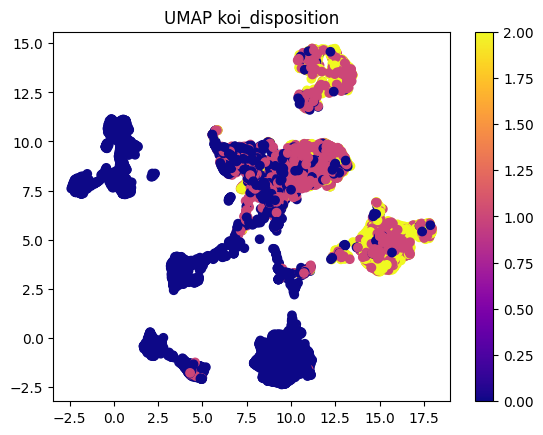

In [12]:
test = df_filtered.iloc[:, 1:].values
reducer = umap.UMAP(random_state=1)
scaled_test_data = StandardScaler().fit_transform(test)
embedding = reducer.fit_transform(scaled_test_data)
print(embedding)
print(embedding.shape)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_filtered.koi_disposition, 
    cmap='plasma'
)

plt.colorbar()
plt.title('UMAP koi_disposition')
plt.show()

Text(0.5, 1.0, 'UMAP koi_fpflag_ss')

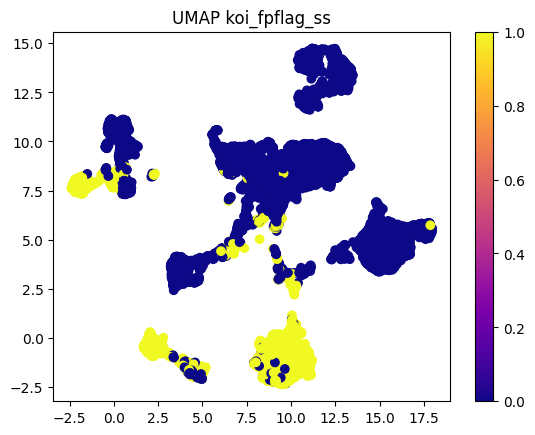

In [13]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_fpflag_ss,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_fpflag_ss')

Text(0.5, 1.0, 'UMAP koi_teq')

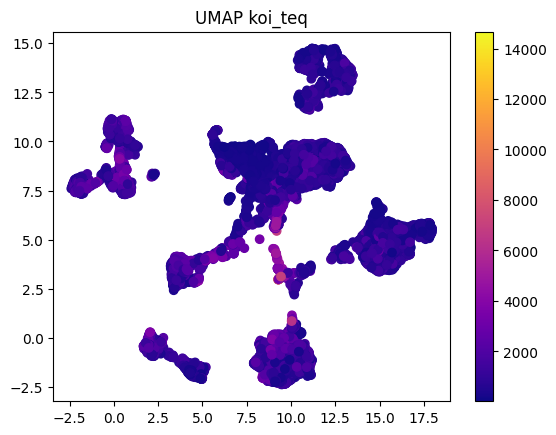

In [14]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df.koi_teq,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_teq')

Text(0.5, 1.0, 'UMAP koi_slogg')

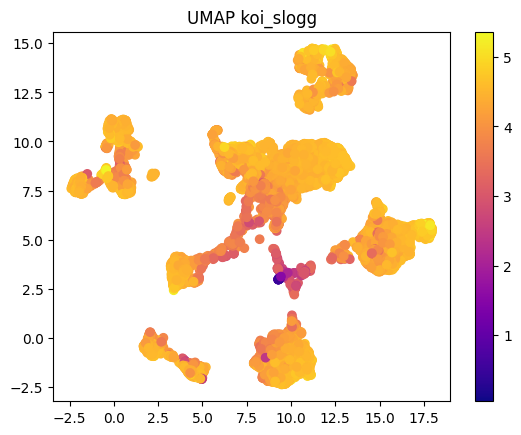

In [15]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df.koi_slogg,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_slogg')